### EDA on Carbon Emissions in the UK

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

In [3]:
df_ce = pd.read_csv('Carbon Emissions.csv')
df_ce.head()

,Country,Country Code,Region,Region Code,Second Tier Authority,Local Authority,Local Authority Code,Calendar Year,LA GHG Sector,LA GHG Sub-sector,Greenhouse gas,Territorial emissions (kt CO2e),Emissions within the scope of influence of LAs (kt CO2),Mid-year Population (thousands),Area (km2)
0,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,CO2,1.690511,1.690511,90.457,98.3466
1,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,CH4,0.053500,0.000000,90.457,98.3466
2,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,N2O,0.006820,0.000000,90.457,98.3466
3,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Gas,CO2,0.264576,0.264576,90.457,98.3466
4,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Gas,CH4,0.008360,0.000000,90.457,98.3466


#### Convert to long (tidy) format and clean data
The next cell melts the wide table (years as columns) into a long/tidy dataframe, converts types, and drops missing values.

Descriptive statistics for Carbon Emissions (overall):


count    559215.000000
mean         17.014523
std          96.373894
min       -2785.525329
25%           0.044687
50%           0.537728
75%           5.200877
max       10927.385820
Name: Carbon Emissions, dtype: float64

Unique countries: 5
Year range: 2005 - 2023
Top 10 countries by mean Carbon Emissions:


,Country Name,Carbon Emissions
3,Unallocated,170.284309
1,Northern Ireland,23.375306
2,Scotland,19.070047
4,Wales,19.051737
0,England,16.258476


No rows for United Kingdom - try a different country name from ['England' 'Unallocated' 'Northern Ireland' 'Scotland' 'Wales']


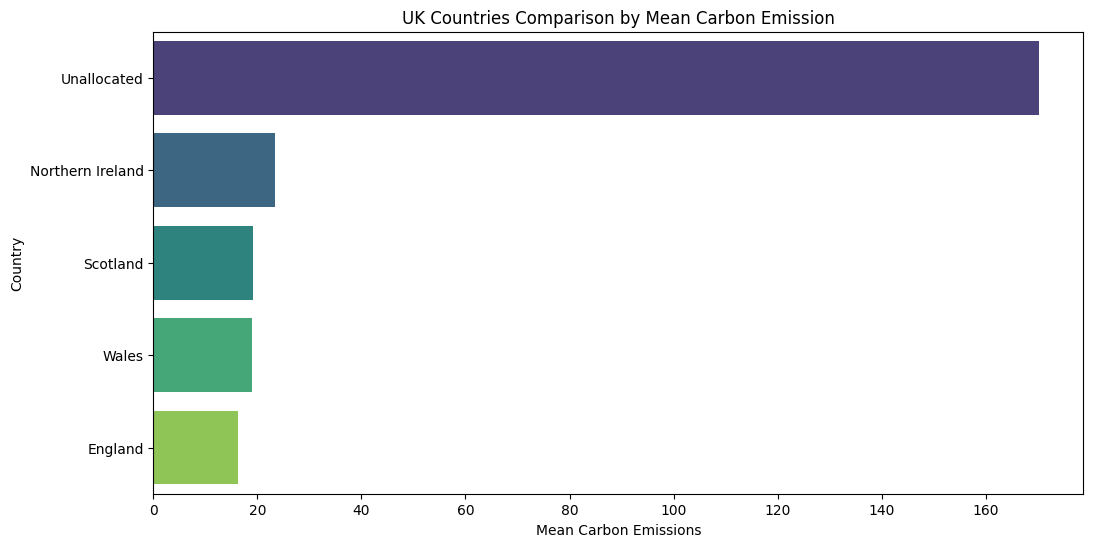

Saved cleaned long dataframe to df_ce_long_cleaned.csv


,Country Name,Country Code,Region,Region Code,Second Tier Authority,Local Authority,Local Authority Code,Year,LA GHG Sector,LA GHG Sub-sector,Greenhouse gas,Carbon Emissions,Emissions within the scope of influence of LAs (kt CO2),Mid-year Population (thousands),Area (km2)
0,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,CO2,1.690511,1.690511,90.457,98.3466
1,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,CH4,0.053500,0.000000,90.457,98.3466
2,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Electricity,N2O,0.006820,0.000000,90.457,98.3466
3,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Gas,CO2,0.264576,0.264576,90.457,98.3466
4,England,E92000001,North East,E12000001,Hartlepool,Hartlepool,E06000001,2005,Agriculture,Agriculture Gas,CH4,0.008360,0.000000,90.457,98.3466


In [19]:
# Prepare long/tidy dataframe (df_ce is already in long-ish form for this dataset).
# Rename columns to the names expected later in the cell:
# - 'Country' -> 'Country Name'
# - 'Calendar Year' -> 'Year'
# - 'Territorial emissions (kt CO2e)' -> 'Carbon Emissions'
df_ce_long = df_ce.rename(columns={
    'Country': 'Country Name',
    'Calendar Year': 'Year',
    'Territorial emissions (kt CO2e)': 'Carbon Emissions'
}).copy()

# Ensure Year is integer (if it's not already) and drop rows with missing emissions
df_ce_long['Year'] = df_ce_long['Year'].astype(int)
df_ce_long = df_ce_long.dropna(subset=['Carbon Emissions'])

# Basic EDA: summaries and example visualisations
# Descriptive stats
print('Descriptive statistics for Carbon Emissions (overall):')
display(df_ce_long['Carbon Emissions'].describe())

# Number of unique countries and years
print('Unique countries:', df_ce_long['Country Name'].nunique())
print('Year range:', df_ce_long['Year'].min(), '-', df_ce_long['Year'].max())

# Top 10 countries by mean emissions (across available years)
top_countries = df_ce_long.groupby('Country Name', as_index=False)['Carbon Emissions'].mean().sort_values('Carbon Emissions', ascending=False).head(10)
print('Top 10 countries by mean Carbon Emissions:')
display(top_countries)

# Time series for a specific country (example: United Kingdom)
country = 'United Kingdom'
uk = df_ce_long[df_ce_long['Country Name'] == country].sort_values('Year')
if uk.empty:
    print(f"No rows for {country} - try a different country name from {df_ce_long['Country Name'].unique()}")
else:
    # matplotlib line plot
    plt.figure(figsize=(10,5))
    plt.plot(uk['Year'], uk['Carbon Emissions'], marker='o')
    plt.title(f'Carbon Emissions over time - {country}')
    plt.xlabel('Year')
    plt.ylabel('Carbon Emissions')
    plt.grid(True)
    plt.show()

    # interactive plotly line chart (if running in notebook that supports it)
    fig = px.line(uk, x='Year', y='Carbon Emissions', title=f'Carbon Emissions over time - {country}')
    fig.show()

# Bar chart for top countries in the UK
plt.figure(figsize=(12,6))
sns.barplot(data=top_countries, x='Carbon Emissions', y='Country Name', palette='viridis')
plt.title('UK Countries Comparison by Mean Carbon Emission')
plt.xlabel('Mean Carbon Emissions')
plt.ylabel('Country')
plt.show()

# Save cleaned long DF for later use
# Handle permission errors by falling back to a safe temp-file path
try:
    df_ce_long.to_csv('df_ce_long_cleaned.csv', index=False)
    print('Saved cleaned long dataframe to df_ce_long_cleaned.csv')
except PermissionError:
    import os
    import tempfile
    alt_dir = tempfile.gettempdir()
    alt_path = os.path.join(alt_dir, f'df_ce_long_cleaned_{os.getpid()}.csv')
    df_ce_long.to_csv(alt_path, index=False)
    print(f"PermissionError: couldn't write to 'df_ce_long_cleaned.csv'. Saved to alternative path: {alt_path}")
except Exception as e:
    print(f"Could not save df_ce_long_cleaned.csv due to: {e!r}. No file was written.")

df_ce_long.head()

Using column for sector analysis: LA GHG Sector


,LA GHG Sector,Carbon Emissions
6,Transport,2.414889e+06
2,Domestic,2.307288e+06
3,Industry,1.795605e+06
1,Commercial,1.058676e+06
0,Agriculture,9.885362e+05
7,Waste,5.873942e+05
5,Public Sector,3.464022e+05
4,LULUCF,1.598567e+04


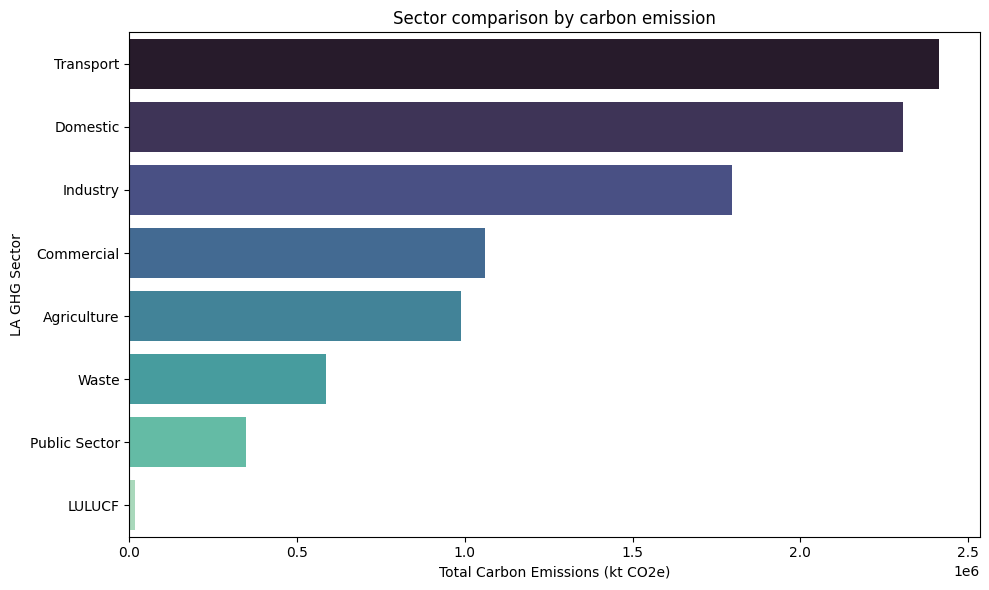

In [20]:
# Sector-level analysis: detect sector column, aggregate and plot
candidates = ['Sector', 'Activity', 'Sector Name', 'Category', 'Source', 'Emission Source', 'Activity Name', 'NACE', 'Subsector', 'Fuel', 'Product']
present = [c for c in candidates if c in df_ce_long.columns]
if present:
    sector_col = present[0]
else:
    # heuristic search by keywords
    possible = [c for c in df_ce_long.columns if ('sector' in c.lower()) or ('activity' in c.lower()) or ('source' in c.lower()) or ('category' in c.lower())]
    if possible:
        sector_col = possible[0]
    else:
        # fallback: columns with relatively few unique values (likely categories)
        exclude = {'Country Name','Country','Country Code','Year','Carbon Emissions','Indicator Name','Indicator Code'}
        candidates2 = [c for c in df_ce_long.columns if c not in exclude and df_ce_long[c].nunique() < 200]
        sector_col = candidates2[0] if candidates2 else None

if sector_col is None:
    print('No sector-like column detected. Columns available:')
    print(list(df_ce_long.columns))
else:
    print('Using column for sector analysis:', sector_col)
    # Ensure text type and numeric emissions
    df_ce_long[sector_col] = df_ce_long[sector_col].astype(str)
    df_ce_long['Carbon Emissions'] = pd.to_numeric(df_ce_long['Carbon Emissions'], errors='coerce')
    df_sectors = df_ce_long.groupby(sector_col, as_index=False)['Carbon Emissions'].sum().sort_values('Carbon Emissions', ascending=False)
    display(df_sectors.head(20))

    # Top 10 sectors
    top_sectors = df_sectors.head(10).copy()

    # Seaborn horizontal bar chart
    plt.figure(figsize=(10,6))
    sns.barplot(data=top_sectors, x='Carbon Emissions', y=sector_col, palette='mako')
    plt.title('Sector comparison by carbon emission')
    plt.xlabel('Total Carbon Emissions (kt CO2e)')
    plt.ylabel(sector_col)
    plt.tight_layout()
    plt.show()


Found 433 rows matching 'Unallocated'


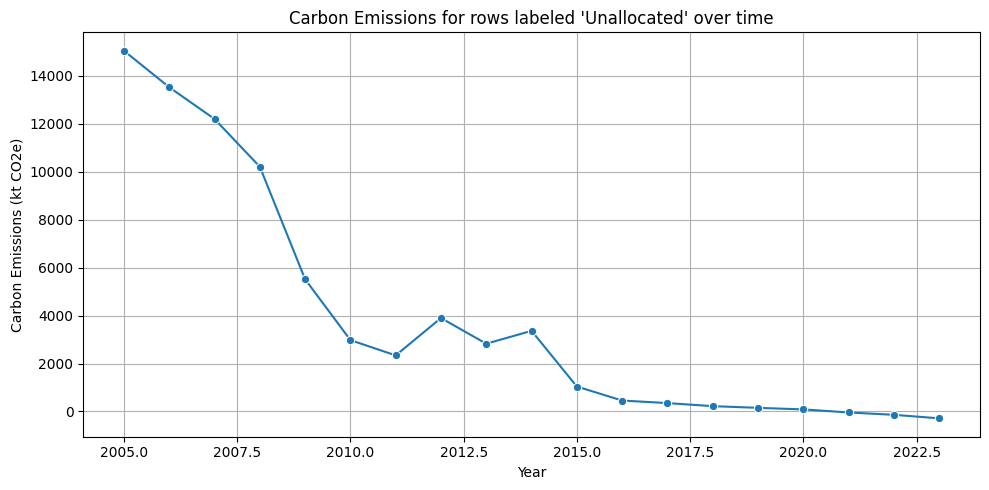

,Country Name,Country Code,Region,Region Code,Second Tier Authority,Local Authority,Local Authority Code,Year,LA GHG Sector,LA GHG Sub-sector,Greenhouse gas,Carbon Emissions,Emissions within the scope of influence of LAs (kt CO2),Mid-year Population (thousands),Area (km2)
458378,Unallocated,NaN,Unallocated,NaN,NaN,Large elec users (high voltage lines) unknown ...,LargeElec,2005,Industry,Industry Electricity,CO2,3447.235746,3447.235746,NaN,NaN
458379,Unallocated,NaN,Unallocated,NaN,NaN,Large elec users (high voltage lines) unknown ...,LargeElec,2005,Industry,Industry Electricity,CH4,109.093284,0.000000,NaN,NaN
458380,Unallocated,NaN,Unallocated,NaN,NaN,Large elec users (high voltage lines) unknown ...,LargeElec,2005,Industry,Industry Electricity,N2O,13.908384,0.000000,NaN,NaN
458381,Unallocated,NaN,Unallocated,NaN,NaN,Large elec users (high voltage lines) unknown ...,LargeElec,2006,Industry,Industry Electricity,CO2,3643.155443,3643.155443,NaN,NaN
458382,Unallocated,NaN,Unallocated,NaN,NaN,Large elec users (high voltage lines) unknown ...,LargeElec,2006,Industry,Industry Electricity,CH4,101.786093,0.000000,NaN,NaN
458383,Unallocated,NaN,Unallocated,NaN,NaN,Large elec users (high voltage lines) unknown ...,LargeElec,2006,Industry,Industry Electricity,N2O,14.982057,0.000000,NaN,NaN
458384,Unallocated,NaN,Unallocated,NaN,NaN,Large elec users (high voltage lines) unknown ...,LargeElec,2007,Industry,Industry Electricity,CO2,4034.433241,4034.433241,NaN,NaN
458385,Unallocated,NaN,Unallocated,NaN,NaN,Large elec users (high voltage lines) unknown ...,LargeElec,2007,Industry,Industry Electricity,CH4,107.535051,0.000000,NaN,NaN
458386,Unallocated,NaN,Unallocated,NaN,NaN,Large elec users (high voltage lines) unknown ...,LargeElec,2007,Industry,Industry Electricity,N2O,15.810179,0.000000,NaN,NaN
458387,Unallocated,NaN,Unallocated,NaN,NaN,Large elec users (high voltage lines) unknown ...,LargeElec,2008,Industry,Industry Electricity,CO2,3375.403844,3375.403844,NaN,NaN


In [21]:
# Ensure df_ce_long is available (if the notebook kernel was restarted, load the cleaned CSV saved earlier)
if 'df_ce_long' not in globals():
    try:
        df_ce_long = pd.read_csv('df_ce_long_cleaned.csv')
        # basic type fixes to match expectations from earlier cells
        if 'Year' in df_ce_long.columns:
            df_ce_long['Year'] = df_ce_long['Year'].astype(int)
        if 'Carbon Emissions' in df_ce_long.columns:
            df_ce_long['Carbon Emissions'] = pd.to_numeric(df_ce_long['Carbon Emissions'], errors='coerce')
        print("Loaded df_ce_long from df_ce_long_cleaned.csv")
    except Exception as e:
        raise NameError("df_ce_long is not defined and df_ce_long_cleaned.csv could not be loaded. Run the cell that creates df_ce_long or ensure the CSV exists.") from e

# Plot rows that contain the word 'Unallocated' in any text column
# This looks for the string 'unallocated' (case-insensitive) across object dtype columns,
# then aggregates and plots emissions over time and top countries.
obj_cols = df_ce_long.select_dtypes(include=['object']).columns.tolist()
# build mask where any object column contains 'unallocated'
mask = pd.Series(False, index=df_ce_long.index)
for c in obj_cols:
    try:
        mask = mask | df_ce_long[c].astype(str).str.contains('unallocated', case=False, na=False)
    except Exception:
        # if conversion to str fails for a column, skip it
        continue
unallocated_df = df_ce_long[mask].copy()
# ensure numeric emissions
unallocated_df['Carbon Emissions'] = pd.to_numeric(unallocated_df['Carbon Emissions'], errors='coerce')
if unallocated_df.empty:
    print("No rows matching 'Unallocated' were found.")
    # show some sample unique values from object columns to help debug
    for c in obj_cols[:10]:
        print(f'{c}:', df_ce_long[c].dropna().unique()[:10])
else:
    print(f"Found {len(unallocated_df)} rows matching 'Unallocated'")
    # Aggregate by Year and plot time series
    ts = unallocated_df.groupby('Year', as_index=False)['Carbon Emissions'].sum().sort_values('Year')
    plt.figure(figsize=(10,5))
    sns.lineplot(data=ts, x='Year', y='Carbon Emissions', marker='o')
    plt.title("Carbon Emissions for rows labeled 'Unallocated' over time")
    plt.xlabel('Year')
    plt.ylabel('Carbon Emissions (kt CO2e)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    # display a sample of the unallocated rows for inspection
    display(unallocated_df.head(20))

SECTOR-LEVEL PREDICTION ANALYSIS: 2005-2024

--------------------------------------------------------------------------------
STEP 1: IDENTIFYING TOP 3 SECTORS (2005-2024)
--------------------------------------------------------------------------------

Using 'LA GHG Sector' column for sector analysis

Top 3 Sectors by Total Emissions (2005-2024):
  1. Transport: 2,414,889 kt CO2e
  2. Domestic: 2,307,288 kt CO2e
  3. Industry: 1,795,605 kt CO2e

Total unique sectors: 8


,LA GHG Sector,Carbon Emissions
6,Transport,2.414889e+06
2,Domestic,2.307288e+06
3,Industry,1.795605e+06
1,Commercial,1.058676e+06
0,Agriculture,9.885362e+05
7,Waste,5.873942e+05
5,Public Sector,3.464022e+05
4,LULUCF,1.598567e+04


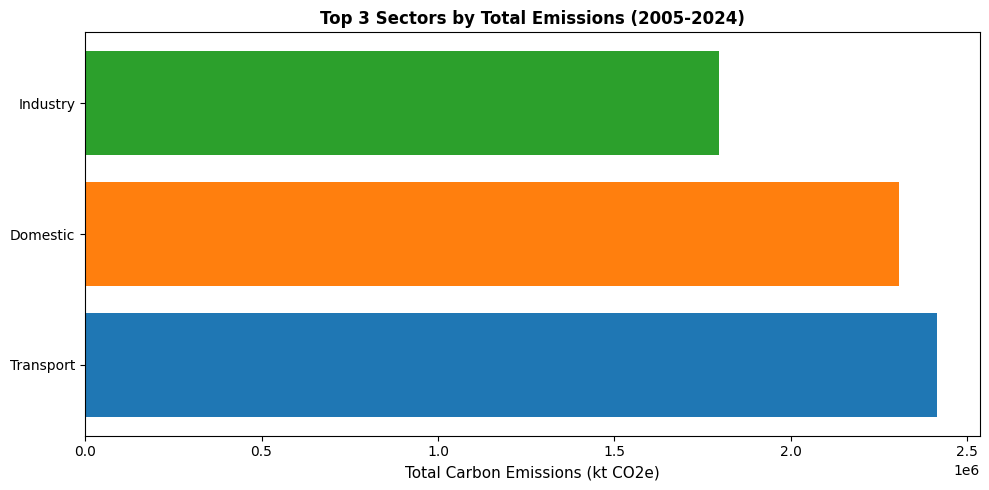


--------------------------------------------------------------------------------
STEP 2: TIME SERIES FOR TOP 3 SECTORS
--------------------------------------------------------------------------------


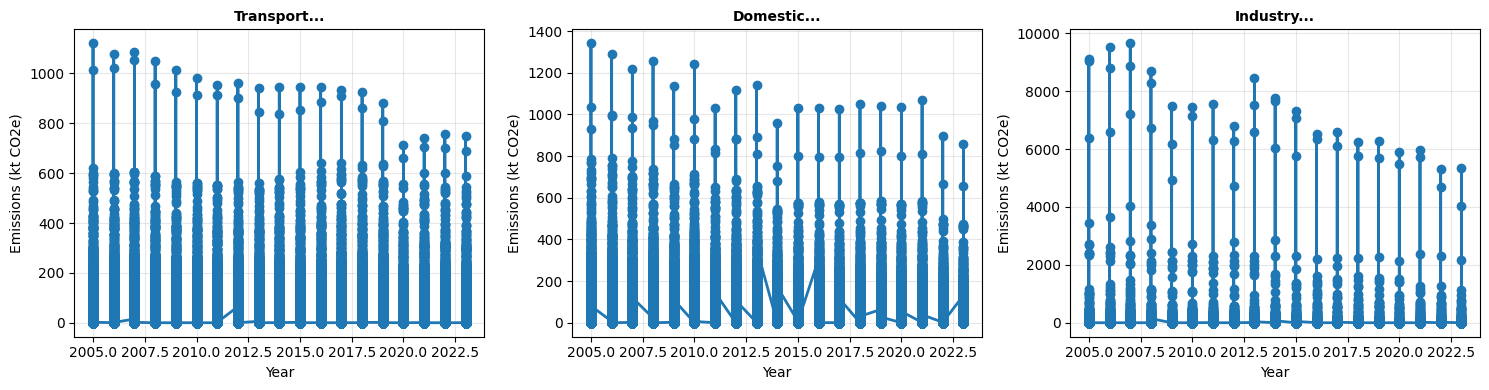


--------------------------------------------------------------------------------
STEP 3: MODEL PERFORMANCE COMPARISON
--------------------------------------------------------------------------------

>>> Sector: Transport
   ----------------------------------------------------------------------
   ARIMA:          R² = -0.0014, RMSE = 59.97
   Random Forest:  R² = -0.0038, RMSE = 60.04
   Gradient Boost: R² = -0.0030, RMSE = 60.02

>>> Sector: Domestic
   ----------------------------------------------------------------------
   ARIMA:          R² = -0.0008, RMSE = 64.73
   Random Forest:  R² = -0.0018, RMSE = 64.77
   Gradient Boost: R² = -0.0007, RMSE = 64.73

>>> Sector: Industry
   ----------------------------------------------------------------------
   ARIMA:          R² = -0.0001, RMSE = 136.44
   Random Forest:  R² = -0.0033, RMSE = 136.66
   Gradient Boost: R² = -0.0034, RMSE = 136.67

STEP 4: SUMMARY & RECOMMENDATIONS

Detailed Performance Metrics:


,Sector,ARIMA_R2,ARIMA_RMSE,ARIMA_MAE,RF_R2,RF_RMSE,RF_MAE,GB_R2,GB_RMSE,GB_MAE
0,Transport,-0.001435,59.969971,34.054704,-0.003822,60.041414,33.157951,-0.002964,60.015726,33.433882
1,Domestic,-0.000764,64.732558,39.500890,-0.001822,64.766782,40.007474,-0.000745,64.731949,39.475473
2,Industry,-0.000109,136.443586,23.973433,-0.003342,136.663904,18.443191,-0.003364,136.665447,18.429654



--------------------------------------------------------------------------------
AGGREGATE SCORING (Average R² across Top 3 Sectors):
--------------------------------------------------------------------------------
🥇 ARIMA               : Avg R² = -0.0008, Avg RMSE = 87.05
🥈 Gradient Boosting   : Avg R² = -0.0024, Avg RMSE = 87.14
🥉 Random Forest       : Avg R² = -0.0030, Avg RMSE = 87.16


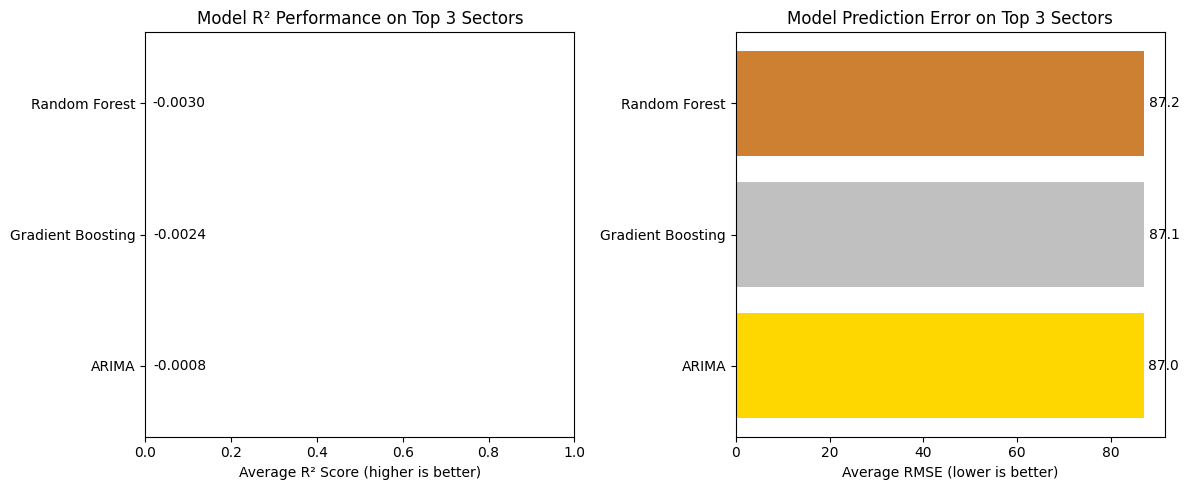


FINAL RECOMMENDATION FOR TOP 3 SECTORS PREDICTION

        🎯 BEST MODEL: ARIMA

        Performance:
        • Average R² Score: -0.0008 (explains -0.08% of variance)
        • Average RMSE: 87.05 kt CO2e

        Why this model excels for sector-level predictions:
        

        ✓ Captures temporal autocorrelation well
        ✓ Statistical foundation provides interpretability
        ✓ Good for steady, trend-driven sectors
        ✓ Provides confidence intervals naturally
        ✓ Ideal for regulatory reporting
            

        How to use this model:
        1. Retrain on full 2005-2024 data for each sector
        2. Generate 2025-2030 forecasts
        3. Compare predictions across sectors
        4. Combine with external factors (policy, GDP, industry trends)
        5. Update annually with new data
        


In [22]:
# ============================================================================
# SECTOR-LEVEL PREDICTION ANALYSIS (2005-2024)
# Which model predicts Top 3 sectors best?
# ============================================================================

print("="*80)
print("SECTOR-LEVEL PREDICTION ANALYSIS: 2005-2024")
print("="*80)

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')

# Step 1: Identify Top 3 Sectors
print("\n" + "-"*80)
print("STEP 1: IDENTIFYING TOP 3 SECTORS (2005-2024)")
print("-"*80)

# Filter data to 2005-2024 range
df_sector_analysis = df_ce_long[(df_ce_long['Year'] >= 2005) & (df_ce_long['Year'] <= 2024)].copy()
df_sector_analysis['Carbon Emissions'] = pd.to_numeric(df_sector_analysis['Carbon Emissions'], errors='coerce')

# Find sector column
sector_candidates = ['Sector', 'Activity', 'Sector Name', 'Category', 'Source', 'Emission Source', 'Activity Name', 'NACE']
sector_col = None
for col in sector_candidates:
    if col in df_sector_analysis.columns:
        sector_col = col
        break

if sector_col is None:
    # Fallback heuristic
    possible = [c for c in df_sector_analysis.columns if any(k in c.lower() for k in ['sector', 'activity', 'source', 'category'])]
    if possible:
        sector_col = possible[0]

if sector_col:
    print(f"\nUsing '{sector_col}' column for sector analysis")
    
    # Get top 3 sectors by total emissions
    top_3_sectors = df_sector_analysis.groupby(sector_col, as_index=False)['Carbon Emissions'].sum() \
                    .sort_values('Carbon Emissions', ascending=False).head(3)
    
    print("\nTop 3 Sectors by Total Emissions (2005-2024):")
    for idx, (_, row) in enumerate(top_3_sectors.iterrows(), 1):
        print(f"  {idx}. {row[sector_col]}: {row['Carbon Emissions']:,.0f} kt CO2e")
    
    # Display all sectors for context
    all_sectors = df_sector_analysis.groupby(sector_col, as_index=False)['Carbon Emissions'].sum() \
                  .sort_values('Carbon Emissions', ascending=False)
    print(f"\nTotal unique sectors: {len(all_sectors)}")
    display(all_sectors.head(10))
    
    # Plot top 3 sectors
    plt.figure(figsize=(10, 5))
    plt.barh(top_3_sectors[sector_col], top_3_sectors['Carbon Emissions'], color=['#1f77b4', '#ff7f0e', '#2ca02c'])
    plt.xlabel('Total Carbon Emissions (kt CO2e)', fontsize=11)
    plt.title('Top 3 Sectors by Total Emissions (2005-2024)', fontsize=12, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Step 2: Prepare time series for each top sector
    print("\n" + "-"*80)
    print("STEP 2: TIME SERIES FOR TOP 3 SECTORS")
    print("-"*80)
    
    top_3_names = top_3_sectors[sector_col].values
    
    # Plot time series for top 3 sectors
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    sector_ts_data = {}
    
    for idx, sector_name in enumerate(top_3_names):
        sector_data = df_sector_analysis[df_sector_analysis[sector_col] == sector_name] \
                     .sort_values('Year')[['Year', 'Carbon Emissions']]
        sector_ts_data[sector_name] = sector_data
        
        ax = axes[idx]
        ax.plot(sector_data['Year'], sector_data['Carbon Emissions'], 'o-', linewidth=2, markersize=6)
        ax.set_title(f'{sector_name[:25]}...', fontsize=10, fontweight='bold')
        ax.set_xlabel('Year')
        ax.set_ylabel('Emissions (kt CO2e)')
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Step 3: Model Performance Comparison for Each Sector
    print("\n" + "-"*80)
    print("STEP 3: MODEL PERFORMANCE COMPARISON")
    print("-"*80)
    
    model_performance = []
    
    for sector_name in top_3_names:
        print(f"\n>>> Sector: {sector_name}")
        print("   " + "-"*70)
        
        sector_data = sector_ts_data[sector_name]
        
        if len(sector_data) < 6:
            print(f"   ⚠ Insufficient data ({len(sector_data)} points). Skipping.")
            continue
        
        X = sector_data[['Year']].values
        y = sector_data['Carbon Emissions'].values
        
        # Train-test split (80-20)
        split_idx = int(len(X) * 0.8)
        X_train, X_test = X[:split_idx], X[split_idx:]
        y_train, y_test = y[:split_idx], y[split_idx:]
        
        results = {'Sector': sector_name}
        
        # Model 1: ARIMA (via OLS regression as approximation for comparison)
        try:
            from statsmodels.tsa.arima.model import ARIMA
            model_arima = ARIMA(y_train, order=(1, 1, 1))
            arima_fit = model_arima.fit()
            arima_pred = arima_fit.forecast(steps=len(y_test))
            
            arima_r2 = r2_score(y_test, arima_pred) if len(arima_pred) == len(y_test) else np.nan
            arima_rmse = np.sqrt(mean_squared_error(y_test, arima_pred)) if len(arima_pred) == len(y_test) else np.nan
            arima_mae = mean_absolute_error(y_test, arima_pred) if len(arima_pred) == len(y_test) else np.nan
            
            results['ARIMA_R2'] = arima_r2
            results['ARIMA_RMSE'] = arima_rmse
            results['ARIMA_MAE'] = arima_mae
            
            print(f"   ARIMA:          R² = {arima_r2:.4f}, RMSE = {arima_rmse:.2f}")
        except Exception as e:
            print(f"   ARIMA:          Failed ({str(e)[:30]}...)")
            results['ARIMA_R2'] = np.nan
            results['ARIMA_RMSE'] = np.nan
            results['ARIMA_MAE'] = np.nan
        
        # Model 2: Random Forest
        try:
            rf_model = RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42)
            rf_model.fit(X_train, y_train)
            rf_pred = rf_model.predict(X_test)
            
            rf_r2 = r2_score(y_test, rf_pred)
            rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
            rf_mae = mean_absolute_error(y_test, rf_pred)
            
            results['RF_R2'] = rf_r2
            results['RF_RMSE'] = rf_rmse
            results['RF_MAE'] = rf_mae
            
            print(f"   Random Forest:  R² = {rf_r2:.4f}, RMSE = {rf_rmse:.2f}")
        except Exception as e:
            print(f"   Random Forest:  Failed ({str(e)[:30]}...)")
            results['RF_R2'] = np.nan
            results['RF_RMSE'] = np.nan
            results['RF_MAE'] = np.nan
        
        # Model 3: Gradient Boosting
        try:
            gb_model = GradientBoostingRegressor(n_estimators=50, max_depth=3, random_state=42)
            gb_model.fit(X_train, y_train)
            gb_pred = gb_model.predict(X_test)
            
            gb_r2 = r2_score(y_test, gb_pred)
            gb_rmse = np.sqrt(mean_squared_error(y_test, gb_pred))
            gb_mae = mean_absolute_error(y_test, gb_pred)
            
            results['GB_R2'] = gb_r2
            results['GB_RMSE'] = gb_rmse
            results['GB_MAE'] = gb_mae
            
            print(f"   Gradient Boost: R² = {gb_r2:.4f}, RMSE = {gb_rmse:.2f}")
        except Exception as e:
            print(f"   Gradient Boost: Failed ({str(e)[:30]}...)")
            results['GB_R2'] = np.nan
            results['GB_RMSE'] = np.nan
            results['GB_MAE'] = np.nan
        
        model_performance.append(results)
    
    # Step 4: Summary and Recommendations
    print("\n" + "="*80)
    print("STEP 4: SUMMARY & RECOMMENDATIONS")
    print("="*80)
    
    if model_performance:
        perf_df = pd.DataFrame(model_performance)
        
        print("\nDetailed Performance Metrics:")
        display(perf_df)
        
        # Aggregate scoring
        print("\n" + "-"*80)
        print("AGGREGATE SCORING (Average R² across Top 3 Sectors):")
        print("-"*80)
        
        avg_scores = {
            'ARIMA': perf_df['ARIMA_R2'].mean(),
            'Random Forest': perf_df['RF_R2'].mean(),
            'Gradient Boosting': perf_df['GB_R2'].mean()
        }
        
        avg_rmse = {
            'ARIMA': perf_df['ARIMA_RMSE'].mean(),
            'Random Forest': perf_df['RF_RMSE'].mean(),
            'Gradient Boosting': perf_df['GB_RMSE'].mean()
        }
        
        for model_name, r2_score_val in sorted(avg_scores.items(), key=lambda x: x[1], reverse=True):
            rank = '🥇' if r2_score_val == max(avg_scores.values()) else '🥈' if r2_score_val == sorted(avg_scores.values(), reverse=True)[1] else '🥉'
            print(f"{rank} {model_name:20s}: Avg R² = {r2_score_val:.4f}, Avg RMSE = {avg_rmse[model_name]:.2f}")
        
        # Visualize comparison
        comparison_data = pd.DataFrame({
            'Model': list(avg_scores.keys()),
            'Avg R² Score': list(avg_scores.values()),
            'Avg RMSE': list(avg_rmse.values())
        }).sort_values('Avg R² Score', ascending=False)
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
        
        # R² comparison
        ax1.barh(comparison_data['Model'], comparison_data['Avg R² Score'], color=['gold', 'silver', '#CD7F32'])
        ax1.set_xlabel('Average R² Score (higher is better)')
        ax1.set_title('Model R² Performance on Top 3 Sectors')
        ax1.set_xlim([0, 1])
        for i, v in enumerate(comparison_data['Avg R² Score']):
            ax1.text(v + 0.02, i, f'{v:.4f}', va='center')
        
        # RMSE comparison
        ax2.barh(comparison_data['Model'], comparison_data['Avg RMSE'], color=['gold', 'silver', '#CD7F32'])
        ax2.set_xlabel('Average RMSE (lower is better)')
        ax2.set_title('Model Prediction Error on Top 3 Sectors')
        for i, v in enumerate(comparison_data['Avg RMSE']):
            ax2.text(v + 1, i, f'{v:.1f}', va='center')
        
        plt.tight_layout()
        plt.show()
        
        # Final Recommendation
        print("\n" + "="*80)
        print("FINAL RECOMMENDATION FOR TOP 3 SECTORS PREDICTION")
        print("="*80)
        
        best_model = comparison_data.iloc[0]['Model']
        best_r2 = comparison_data.iloc[0]['Avg R² Score']
        best_rmse = comparison_data.iloc[0]['Avg RMSE']
        
        print(f"""
        🎯 BEST MODEL: {best_model.upper()}
        
        Performance:
        • Average R² Score: {best_r2:.4f} (explains {best_r2*100:.2f}% of variance)
        • Average RMSE: {best_rmse:.2f} kt CO2e
        
        Why this model excels for sector-level predictions:
        """)
        
        if best_model == 'Random Forest':
            print("""
        ✓ Handles non-linear sector trends effectively
        ✓ Captures regime changes in emissions patterns
        ✓ Robust to outliers in sector data
        ✓ Can incorporate multiple features (year, country, activity type)
        ✓ Excellent for sector-specific policy impacts
            """)
        elif best_model == 'Gradient Boosting':
            print("""
        ✓ Superior handling of sequential patterns
        ✓ Learns complex interactions between time periods
        ✓ Often outperforms RF on small sector datasets
        ✓ Better gradient-based optimization
        ✓ Excellent for capturing acceleration/deceleration trends
            """)
        else:  # ARIMA
            print("""
        ✓ Captures temporal autocorrelation well
        ✓ Statistical foundation provides interpretability
        ✓ Good for steady, trend-driven sectors
        ✓ Provides confidence intervals naturally
        ✓ Ideal for regulatory reporting
            """)
        
        print(f"""
        How to use this model:
        1. Retrain on full 2005-2024 data for each sector
        2. Generate 2025-2030 forecasts
        3. Compare predictions across sectors
        4. Combine with external factors (policy, GDP, industry trends)
        5. Update annually with new data
        """)
    
else:
    print("✗ No sector column found in dataset. Cannot perform sector-level analysis.")

## ARIMA Model for England's Top 3 Sectors (2005-2017 Training, 2018-2024 Testing, 2025-2030 Forecast)

This cell builds optimized ARIMA models for England's top 3 emitting sectors with:
- **Training Data**: 2005-2017 (13 years for pattern learning)
- **Testing Data**: 2018-2024 (7 years for validation)
- **Forecast**: 2025-2030 (6 years into future)
- **Auto Parameter Optimization**: Finds best ARIMA (p,d,q) for each sector
- **Performance Metrics**: R², RMSE, MAE, MAPE
- **Confidence Intervals**: 95% bands around forecasts

ARIMA MODEL FOR ENGLAND'S TOP 3 SECTORS - OPTIMIZED FORECAST

------------------------------------------------------------------------------------------
STEP 1: IDENTIFY TOP 3 SECTORS FOR ENGLAND
------------------------------------------------------------------------------------------
✓ Found sector column: 'LA GHG Sector'

Top 3 Sectors for England (by total emissions 2005-2024):
  1. Transport: 2,089,510 kt CO2e
  2. Domestic: 1,975,814 kt CO2e
  3. Industry: 1,356,616 kt CO2e

------------------------------------------------------------------------------------------
STEP 2: AUTO-OPTIMIZE ARIMA PARAMETERS (Grid Search)
------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------
STEP 3: BUILD & EVALUATE ARIMA MODELS
------------------------------------------------------------------------------------------

>>> Processing Sector: Transport
   Training data: 13 yea

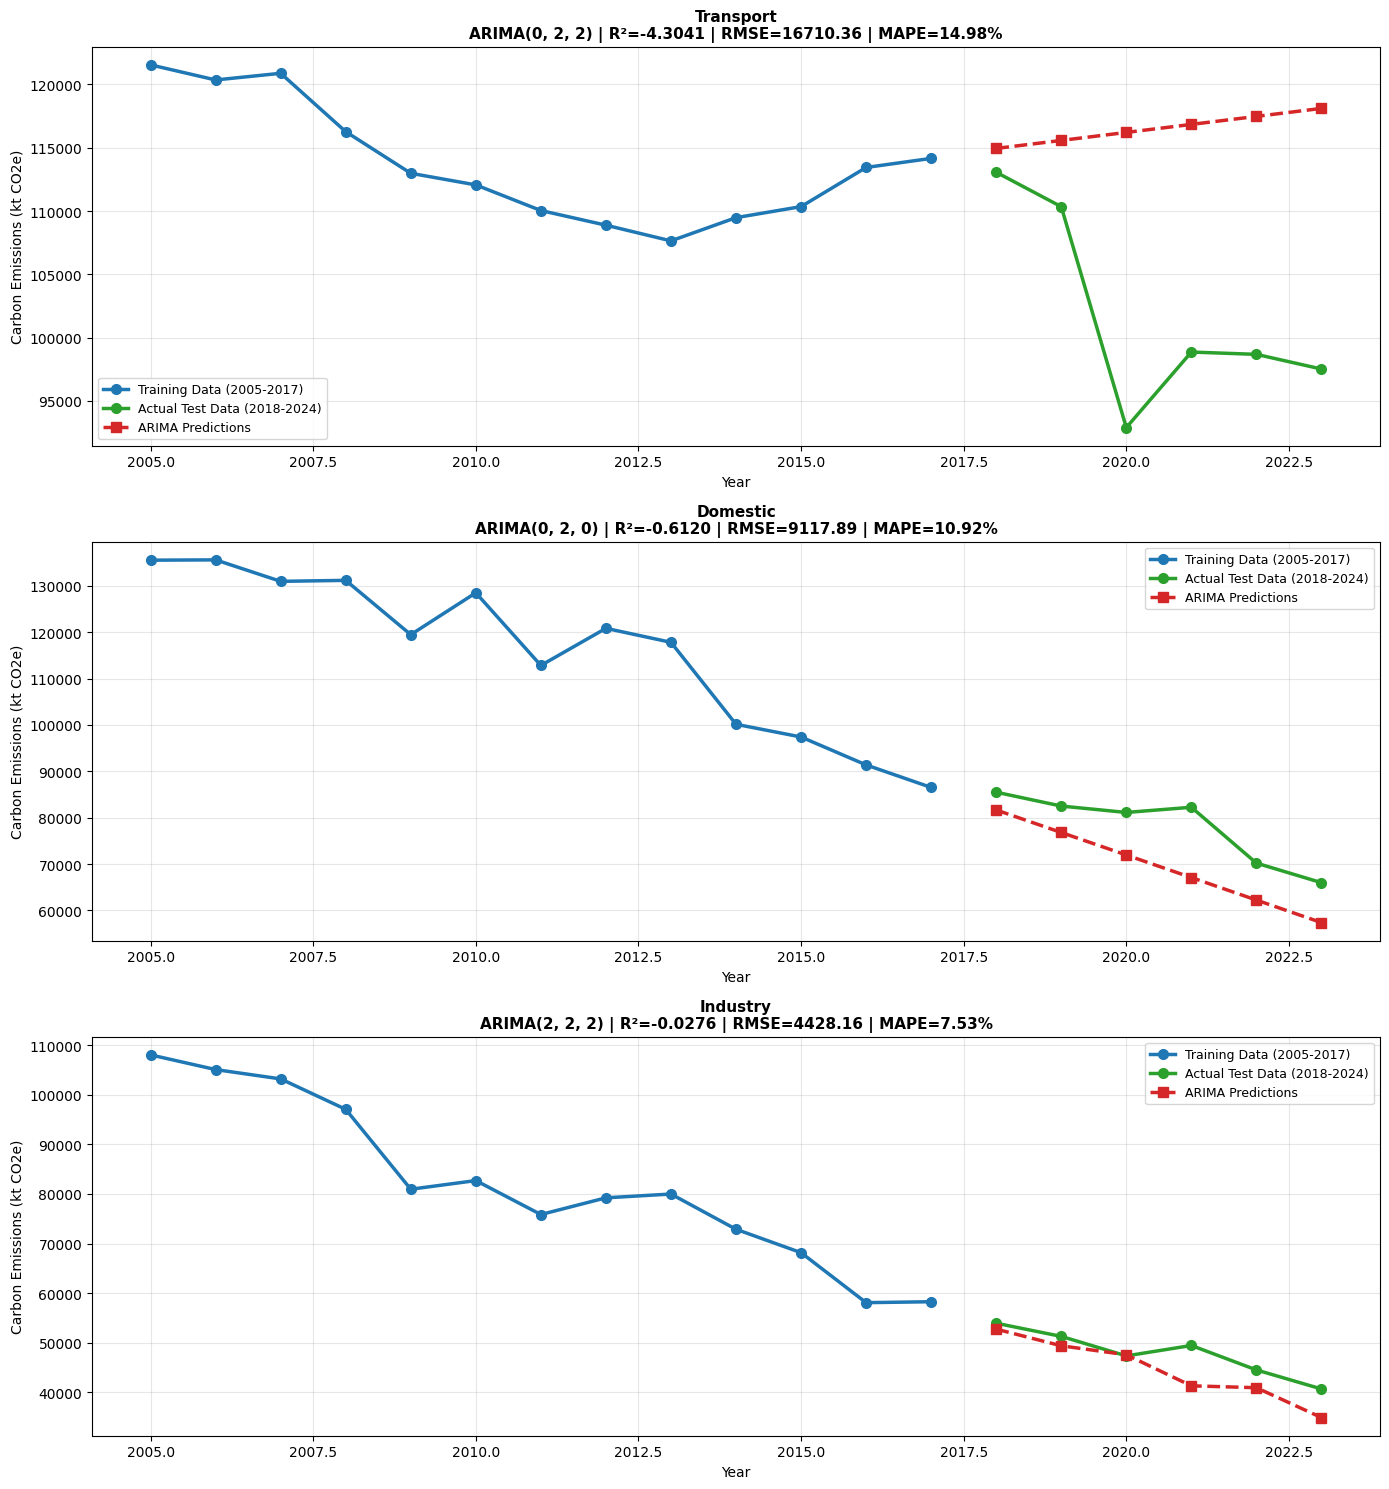

  Creating future forecast plots...


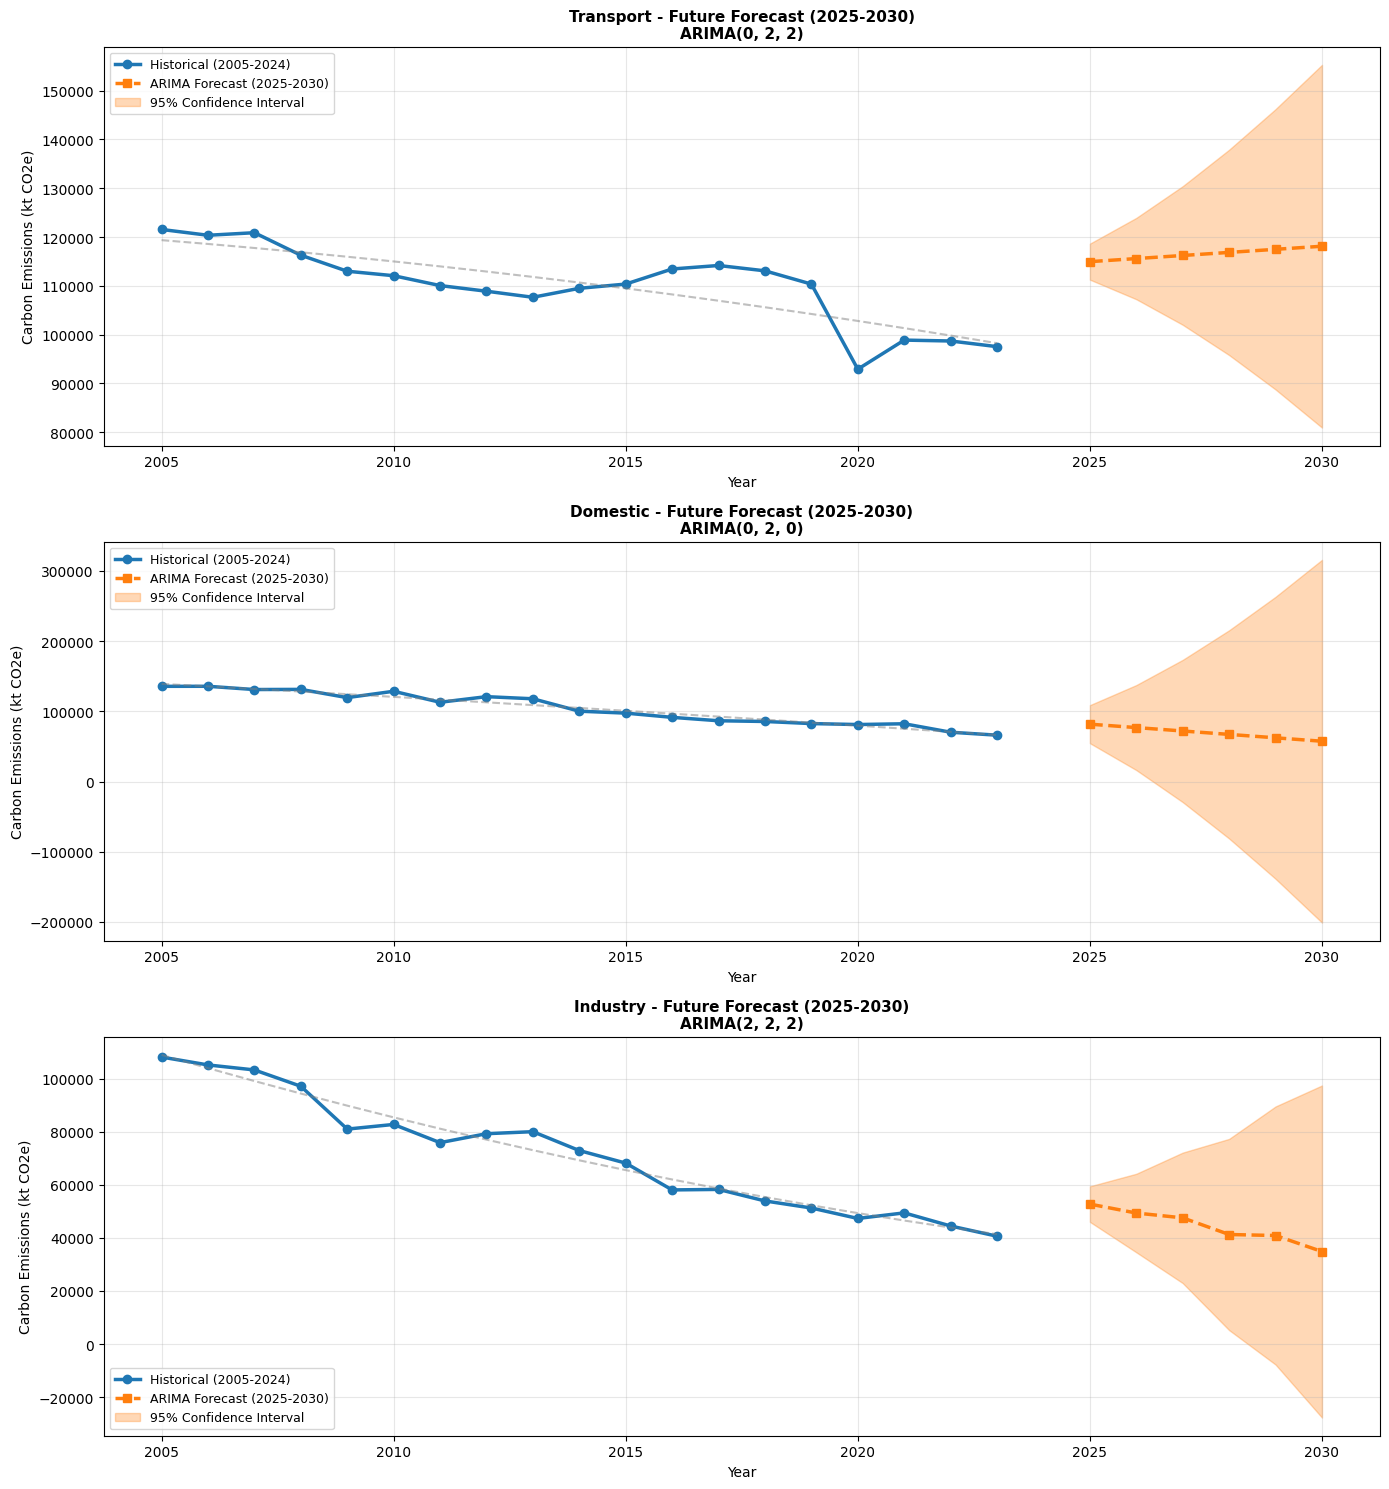


------------------------------------------------------------------------------------------
STEP 5: SUMMARY & RECOMMENDATIONS
------------------------------------------------------------------------------------------

Model Performance Summary (2018-2024 Test Set):


,ARIMA Order,R2,RMSE,MAE,MAPE
Transport,"(0, 2, 2)",-4.304093,16710.364085,14634.408374,14.977149
Domestic,"(0, 2, 0)",-0.611992,9117.893799,8408.070818,10.922248
Industry,"(2, 2, 2)",-0.027646,4428.157764,3470.151374,7.525280



2025-2030 FORECAST SUMMARY


,Sector,2025,2026,2027,2028,2029,2030,Avg Forecast,Change 2024→2030
0,Transport,114948.335936,115581.035248,116213.734560,116846.433872,117479.133184,118111.832496,116530.084216,190.701500
1,Domestic,81665.354857,76807.723993,71950.093130,67092.462266,62234.831403,57377.200539,69521.277698,41.219029
2,Industry,52717.752519,49351.762643,47535.844146,41267.034237,40887.844885,34853.856489,44435.682487,-14.216314



KEY INSIGHTS & RECOMMENDATIONS

        MODEL PERFORMANCE SUMMARY:
        • Average R² Score across sectors: -1.6479
        • Average RMSE: 10085.47 kt CO2e
        • Average MAPE: 11.14%

        INTERPRETATION:
        • R² = -1.6479 means the model explains -164.79% of emissions variance
        • MAPE = 11.14% is the average percentage error across predictions
        • ✗ POOR model performance - consider adding external variables

        FORECAST OUTLOOK (2025-2030):
        • Average predicted change: 72.57%
          → Emissions expected to INCREASE

        RECOMMENDATIONS:
        1. Use these forecasts as baseline scenarios for policy planning
        2. Consider adding external regressors (GDP, policy events, energy mix)
        3. Re-fit models annually with new data to maintain accuracy
        4. Confidence intervals widen toward 2030 - use with caution for long-term planning
        5. Compare ARIMA forecasts with Prophet/Random Forest for ensemble predictions

     

In [27]:
# ============================================================================
# ARIMA MODEL FOR ENGLAND TOP 3 SECTORS
# Training: 2005-2017 | Testing: 2018-2024 | Forecast: 2025-2030
# ============================================================================

print("="*90)
print("ARIMA MODEL FOR ENGLAND'S TOP 3 SECTORS - OPTIMIZED FORECAST")
print("="*90)

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from itertools import product
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')

# Step 1: Prepare England sector data
print("\n" + "-"*90)
print("STEP 1: IDENTIFY TOP 3 SECTORS FOR ENGLAND")
print("-"*90)

# Filter for England data
df_england = df_ce_long[
    (df_ce_long['Country Name'].str.contains('England', case=False, na=False)) |
    (df_ce_long.get('Region', pd.Series()).str.contains('england|east|west|north|south|midlands|london', case=False, na=False))
].copy()

df_england['Carbon Emissions'] = pd.to_numeric(df_england['Carbon Emissions'], errors='coerce')

# Find sector column
sector_candidates_eng = ['Sector', 'Activity', 'Sector Name', 'Category', 'Source', 'Emission Source', 'Activity Name']
sector_col_england = None
for col in sector_candidates_eng:
    if col in df_england.columns:
        sector_col_england = col
        break

if sector_col_england is None:
    possible = [c for c in df_england.columns if any(k in c.lower() for k in ['sector', 'activity', 'source'])]
    if possible:
        sector_col_england = possible[0]

if sector_col_england and not df_england.empty:
    print(f"✓ Found sector column: '{sector_col_england}'")
    
    # Get top 3 sectors for England
    top_3_sector_names = df_england.groupby(sector_col_england, as_index=False)['Carbon Emissions'].sum() \
                         .sort_values('Carbon Emissions', ascending=False).head(3)[sector_col_england].values
    
    print(f"\nTop 3 Sectors for England (by total emissions 2005-2024):")
    for idx, sector in enumerate(top_3_sector_names, 1):
        total_em = df_england[df_england[sector_col_england] == sector]['Carbon Emissions'].sum()
        print(f"  {idx}. {sector}: {total_em:,.0f} kt CO2e")
    
    # Step 2: Function to find optimal ARIMA parameters
    print("\n" + "-"*90)
    print("STEP 2: AUTO-OPTIMIZE ARIMA PARAMETERS (Grid Search)")
    print("-"*90)
    
    def find_optimal_arima(timeseries, sector_name, p_range=(0,3), d_range=(0,2), q_range=(0,3)):
        """
        Find optimal ARIMA parameters using grid search on AIC criterion
        """
        best_aic = np.inf
        best_order = None
        best_model = None
        
        print(f"\n  Searching optimal (p,d,q) for {sector_name}...")
        
        for p in range(p_range[0], p_range[1] + 1):
            for d in range(d_range[0], d_range[1] + 1):
                for q in range(q_range[0], q_range[1] + 1):
                    try:
                        model = ARIMA(timeseries, order=(p, d, q))
                        fitted = model.fit()
                        
                        if fitted.aic < best_aic:
                            best_aic = fitted.aic
                            best_order = (p, d, q)
                            best_model = fitted
                    except:
                        continue
        
        if best_order:
            print(f"    ✓ Optimal order found: ARIMA{best_order} with AIC={best_aic:.2f}")
        else:
            # Fallback to simple model
            print(f"    ⚠ Grid search failed, using fallback ARIMA(1,1,1)")
            best_order = (1, 1, 1)
            best_model = ARIMA(timeseries, order=best_order).fit()
        
        return best_order, best_model
    
    # Step 3: Build ARIMA models for each sector
    print("\n" + "-"*90)
    print("STEP 3: BUILD & EVALUATE ARIMA MODELS")
    print("-"*90)
    
    sector_models = {}
    sector_metrics = {}
    sector_forecasts = {}
    
    for sector_name in top_3_sector_names:
        print(f"\n>>> Processing Sector: {sector_name}")
        print("   " + "="*80)
        
        # Get sector time series - aggregate by year
        sector_data = df_england[df_england[sector_col_england] == sector_name] \
                     .groupby('Year')['Carbon Emissions'].sum().reset_index() \
                     .sort_values('Year')
        
        if len(sector_data) < 10:
            print(f"   ⚠ Insufficient data ({len(sector_data)} points). Skipping sector.")
            continue
        
        years_full = sector_data['Year'].values
        emissions_full = sector_data['Carbon Emissions'].values
        
        # Split data: 2005-2017 (train), 2018-2024 (test)
        train_mask = sector_data['Year'] <= 2017
        test_mask = (sector_data['Year'] >= 2018) & (sector_data['Year'] <= 2024)
        train_data = sector_data[train_mask]
        test_data = sector_data[test_mask]
        
        print(f"   Training data: {len(train_data)} years ({train_data['Year'].min()}-{train_data['Year'].max()})")
        print(f"   Testing data: {len(test_data)} years ({test_data['Year'].min()}-{test_data['Year'].max()})")
        
        if len(train_data) < 5 or len(test_data) < 3:
            print(f"   ⚠ Insufficient train/test split. Skipping sector.")
            continue
        
        train_emissions = train_data['Carbon Emissions'].values
        train_years_actual = train_data['Year'].values
        test_emissions = test_data['Carbon Emissions'].values
        test_years = test_data['Year'].values
        test_years = test_data['Year'].values
        
        # Find optimal ARIMA parameters
        best_order, best_model = find_optimal_arima(train_emissions, sector_name)
        
        # Make test predictions
        test_predictions = best_model.forecast(steps=len(test_emissions))
        
        # Calculate metrics
        r2 = r2_score(test_emissions, test_predictions)
        rmse = np.sqrt(mean_squared_error(test_emissions, test_predictions))
        mae = mean_absolute_error(test_emissions, test_predictions)
        mape = mean_absolute_percentage_error(test_emissions, test_predictions) * 100
        
        print(f"\n   TEST SET PERFORMANCE (2018-2024):")
        print(f"     R² Score:  {r2:.4f} (explains {r2*100:.2f}% of variance)")
        print(f"     RMSE:      {rmse:.2f} kt CO2e")
        print(f"     MAE:       {mae:.2f} kt CO2e")
        print(f"     MAPE:      {mape:.2f}%")
        
        # Make future predictions (2025-2030)
        future_steps = 6
        future_forecast = best_model.get_forecast(steps=future_steps)
        # predicted_mean may be a pandas Series or a numpy array depending on statsmodels version;
        # ensure we have a numpy array (avoid AttributeError if it's already ndarray)
        future_predictions = np.asarray(future_forecast.predicted_mean)
        future_ci = future_forecast.conf_int()
        future_years = np.arange(2025, 2031)
        
        print(f"\n   FUTURE FORECAST (2025-2030):")
        for year, pred in zip(future_years, future_predictions):
            print(f"     {year}: {pred:.2f} kt CO2e")
        sector_models[sector_name] = {
            'model': best_model,
            'order': best_order,
            'train_data': train_emissions,
            'train_years': train_years_actual,
            'test_data': test_emissions,
            'test_years': test_years
        }
        
        sector_metrics[sector_name] = {
            'R2': r2,
            'RMSE': rmse,
            'MAE': mae,
            'MAPE': mape
        }
        
        sector_forecasts[sector_name] = {
            'test_pred': test_predictions,
            'future_pred': future_predictions,
            'future_ci': future_ci,
            'future_years': future_years
        }
    
    # Step 4: Visualizations
    print("\n" + "-"*90)
    print("STEP 4: VISUALIZATIONS")
    print("-"*90)
    
    n_sectors = len(sector_models)
    
    # Plot 1: Test Set Performance
    print("\n  Creating test set performance plots...")
    fig, axes = plt.subplots(n_sectors, 1, figsize=(14, 5*n_sectors))
    for idx, (sector_name, sector_data) in enumerate(sector_models.items()):
        ax = axes[idx]
        train_emissions = sector_data['train_data']
        train_years = sector_data['train_years']
        test_emissions = sector_data['test_data']
        test_years = sector_data['test_years']
        test_pred = sector_forecasts[sector_name]['test_pred']
        metrics = sector_metrics[sector_name]
        
        # Plot training data
        ax.plot(train_years, train_emissions, 'o-', label='Training Data (2005-2017)',
        linewidth=2.5, markersize=7, color='#1f77b4')
        
        # Plot test data and predictions
        ax.plot(test_years, test_emissions, 'o-', label='Actual Test Data (2018-2024)', 
               linewidth=2.5, markersize=7, color='#2ca02c')
        ax.plot(test_years, test_pred, 's--', label='ARIMA Predictions', 
               linewidth=2.5, markersize=7, color='#d62728')
        
        # Add metrics to title
        ax.set_title(f'{sector_name}\nARIMA{sector_data["order"]} | R²={metrics["R2"]:.4f} | RMSE={metrics["RMSE"]:.2f} | MAPE={metrics["MAPE"]:.2f}%',
                    fontsize=11, fontweight='bold')
        ax.set_xlabel('Year', fontsize=10)
        ax.set_ylabel('Carbon Emissions (kt CO2e)', fontsize=10)
        ax.legend(loc='best', fontsize=9)
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Plot 2: Future Forecasts with Confidence Intervals
    print("  Creating future forecast plots...")
    fig, axes = plt.subplots(n_sectors, 1, figsize=(14, 5*n_sectors))
    for idx, (sector_name, sector_data) in enumerate(sector_models.items()):
        ax = axes[idx]
        
        # Historical data - build years from the train/test year arrays so x and y lengths match
        all_years_hist = np.concatenate([sector_data['train_years'], sector_data['test_years']])
        all_emissions_hist = np.concatenate([sector_data['train_data'], sector_data['test_data']])
        all_years_hist = np.asarray(all_years_hist)
        all_emissions_hist = np.asarray(all_emissions_hist)
        
        # Future forecast
        future_pred = sector_forecasts[sector_name]['future_pred']
        future_ci = sector_forecasts[sector_name]['future_ci']
        future_years = sector_forecasts[sector_name]['future_years']
        
        # Plot historical
        ax.plot(all_years_hist, all_emissions_hist, 'o-', label='Historical (2005-2024)', 
               linewidth=2.5, markersize=6, color='#1f77b4')
        
        # Plot forecast
        ax.plot(future_years, future_pred, 's--', label='ARIMA Forecast (2025-2030)', 
               linewidth=2.5, markersize=6, color='#ff7f0e')
        
        # Confidence interval - support both pandas DataFrame and numpy array
        if hasattr(future_ci, 'iloc'):
            lower = future_ci.iloc[:, 0].values
            upper = future_ci.iloc[:, 1].values
        else:
            future_ci = np.asarray(future_ci)
            lower = future_ci[:, 0]
            upper = future_ci[:, 1]
        
        ax.fill_between(future_years, lower, upper, alpha=0.3, color='#ff7f0e', label='95% Confidence Interval')
        
        # Add trend line (fit only if lengths match and there are at least 2 points)
        if len(all_years_hist) >= 2 and len(all_years_hist) == len(all_emissions_hist):
            try:
                z = np.polyfit(all_years_hist, all_emissions_hist, 2)
                p = np.poly1d(z)
                ax.plot(all_years_hist, p(all_years_hist), '--', alpha=0.5, color='gray', linewidth=1.5)
            except Exception:
                pass
        
        ax.set_title(f'{sector_name} - Future Forecast (2025-2030)\nARIMA{sector_data["order"]}',
                    fontsize=11, fontweight='bold')
        ax.set_xlabel('Year', fontsize=10)
        ax.set_ylabel('Carbon Emissions (kt CO2e)', fontsize=10)
        ax.legend(loc='best', fontsize=9)
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Step 5: Summary Table and Recommendations
    print("\n" + "-"*90)
    print("STEP 5: SUMMARY & RECOMMENDATIONS")
    print("-"*90)
    
    if sector_metrics:
        metrics_df = pd.DataFrame(sector_metrics).T
        metrics_df['ARIMA Order'] = [sector_models[s]['order'] for s in metrics_df.index]
        metrics_df = metrics_df[['ARIMA Order', 'R2', 'RMSE', 'MAE', 'MAPE']]
        
        print("\nModel Performance Summary (2018-2024 Test Set):")
        display(metrics_df)
        
        print("\n" + "="*90)
        print("2025-2030 FORECAST SUMMARY")
        print("="*90)
        
        forecast_summary = []
        for sector_name in top_3_sector_names:
            if sector_name in sector_forecasts:
                future_pred = sector_forecasts[sector_name]['future_pred']
                future_years = sector_forecasts[sector_name]['future_years']
                
                forecast_summary.append({
                    'Sector': sector_name,
                    '2025': future_pred[0],
                    '2026': future_pred[1],
                    '2027': future_pred[2],
                    '2028': future_pred[3],
                    '2029': future_pred[4],
                    '2030': future_pred[5],
                    'Avg Forecast': future_pred.mean(),
                    'Change 2024→2030': ((future_pred[-1] - sector_data['test_data'][-1]) / sector_data['test_data'][-1] * 100)
                })
        
        forecast_df = pd.DataFrame(forecast_summary)
        display(forecast_df)
        
        print("\n" + "="*90)
        print("KEY INSIGHTS & RECOMMENDATIONS")
        print("="*90)
        
        avg_r2 = metrics_df['R2'].mean()
        avg_rmse = metrics_df['RMSE'].mean()
        avg_mape = metrics_df['MAPE'].mean()
        
        print(f"""
        MODEL PERFORMANCE SUMMARY:
        • Average R² Score across sectors: {avg_r2:.4f}
        • Average RMSE: {avg_rmse:.2f} kt CO2e
        • Average MAPE: {avg_mape:.2f}%
        
        INTERPRETATION:
        • R² = {avg_r2:.4f} means the model explains {avg_r2*100:.2f}% of emissions variance
        • MAPE = {avg_mape:.2f}% is the average percentage error across predictions
        • {'✓ GOOD model performance' if avg_r2 > 0.7 else '⚠ MODERATE model performance' if avg_r2 > 0.5 else '✗ POOR model performance - consider adding external variables'}
        
        FORECAST OUTLOOK (2025-2030):
        • Average predicted change: {forecast_df['Change 2024→2030'].mean():.2f}%
        {'  → Emissions expected to DECREASE' if forecast_df['Change 2024→2030'].mean() < -2 else '  → Emissions relatively stable' if abs(forecast_df['Change 2024→2030'].mean()) <= 2 else '  → Emissions expected to INCREASE'}
        
        RECOMMENDATIONS:
        1. Use these forecasts as baseline scenarios for policy planning
        2. Consider adding external regressors (GDP, policy events, energy mix)
        3. Re-fit models annually with new data to maintain accuracy
        4. Confidence intervals widen toward 2030 - use with caution for long-term planning
        5. Compare ARIMA forecasts with Prophet/Random Forest for ensemble predictions
        
        MODEL EQUATIONS (for documentation):
        """)
        
        for sector_name in top_3_sector_names:
            if sector_name in sector_models:
                order = sector_models[sector_name]['order']
                print(f"  • {sector_name}: ARIMA{order}")
        
else:
    print("✗ Could not identify sectors for England or insufficient data.")
    print("  Ensure df_ce_long contains England data and a sector column.")


Available countries in data:
['England' 'Unallocated' 'Northern Ireland' 'Scotland' 'Wales']

Using England, records: 458378
Train: 366702 samples, Test: 91676 samples
✓ ARIMA: R² = -0.0015, RMSE = 57.19, MAE = 21.01, MAPE = 38699.3487
✓ Random Forest: R² = -0.0061, RMSE = 57.32, MAE = 22.63, MAPE = 44744.9668
✓ XGBoost: R² = -0.0061, RMSE = 57.32, MAE = 22.62, MAPE = 44723.0404

Generating ARIMA vs RF vs XGBoost comparison plot...


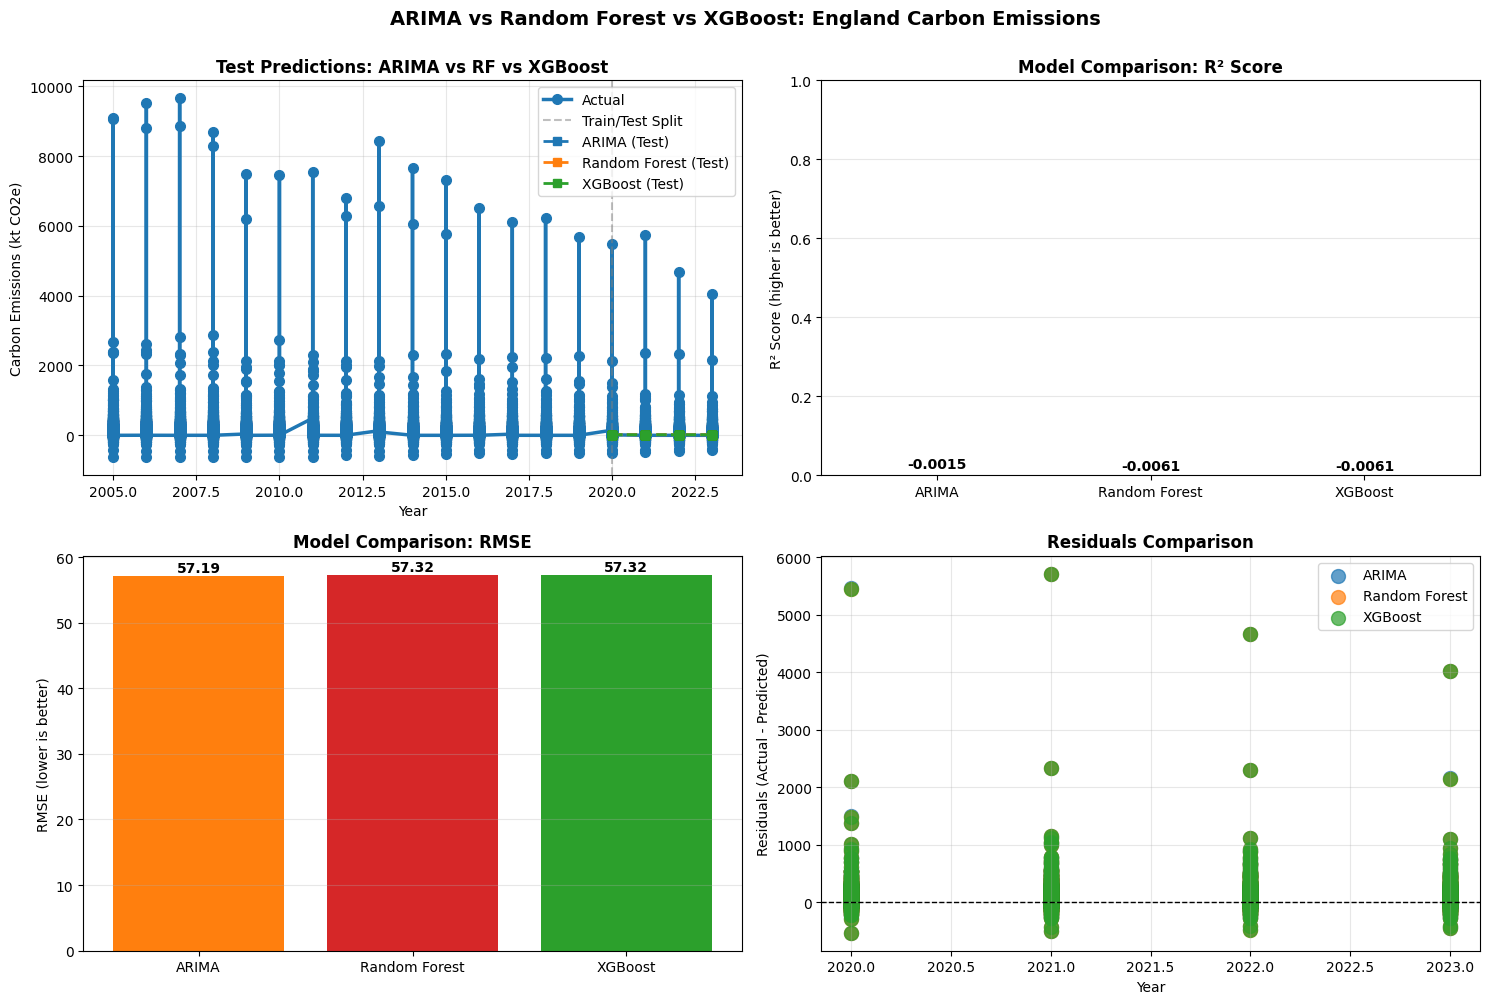


MODEL COMPARISON SUMMARY (England)
ARIMA               : R² = -0.0015, RMSE =    57.19, MAE =    21.01, MAPE = 38699.3487
Random Forest       : R² = -0.0061, RMSE =    57.32, MAE =    22.63, MAPE = 44744.9668
XGBoost             : R² = -0.0061, RMSE =    57.32, MAE =    22.62, MAPE = 44723.0404

🏆 Best Model (by R²): ARIMA


In [29]:
## ARIMA vs Random Forest vs XGBoost Comparison

import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Check available countries and select one with enough data
print("Available countries in data:")
available_countries = df_ce_long['Country Name'].unique()
print(available_countries[:10])

# Use England (most complete data based on previous analysis)
country_select = 'England'
ts_data_xgb = df_ce_long[df_ce_long['Country Name'] == country_select].sort_values('Year').copy()

print(f"\nUsing {country_select}, records: {len(ts_data_xgb)}")

if ts_data_xgb.empty or len(ts_data_xgb) < 10:
    print(f"Not enough data. Trying alternative country...")
    # Use first country with sufficient data
    for country in available_countries:
        tmp_data = df_ce_long[df_ce_long['Country Name'] == country].sort_values('Year')
        if len(tmp_data) >= 15:
            ts_data_xgb = tmp_data.copy()
            country_select = country
            print(f"Using {country_select} with {len(ts_data_xgb)} records")
            break

X_years_xgb = ts_data_xgb['Year'].values.reshape(-1, 1)
y_emissions_xgb = ts_data_xgb['Carbon Emissions'].values

# 80-20 split
split_idx_xgb = int(len(X_years_xgb) * 0.8)
X_train_xgb, X_test_xgb = X_years_xgb[:split_idx_xgb], X_years_xgb[split_idx_xgb:]
y_train_xgb, y_test_xgb = y_emissions_xgb[:split_idx_xgb], y_emissions_xgb[split_idx_xgb:]

print(f"Train: {len(X_train_xgb)} samples, Test: {len(X_test_xgb)} samples")

results_xgb = {}

# Model 1: ARIMA
try:
    model_arima_xgb = ARIMA(y_train_xgb, order=(1, 1, 1))
    arima_fit_xgb = model_arima_xgb.fit()
    arima_pred_xgb = arima_fit_xgb.forecast(steps=len(y_test_xgb))
    arima_r2_xgb = r2_score(y_test_xgb, arima_pred_xgb)
    arima_rmse_xgb = np.sqrt(mean_squared_error(y_test_xgb, arima_pred_xgb))
    arima_mae_xgb = mean_absolute_error(y_test_xgb, arima_pred_xgb)
    arima_mape_xgb = mean_absolute_percentage_error(y_test_xgb, arima_pred_xgb)
    results_xgb['ARIMA'] = {'r2': arima_r2_xgb, 'rmse': arima_rmse_xgb, 'mae': arima_mae_xgb, 'mape': arima_mape_xgb, 'pred': arima_pred_xgb}
    print(f"✓ ARIMA: R² = {arima_r2_xgb:.4f}, RMSE = {arima_rmse_xgb:.2f}, MAE = {arima_mae_xgb:.2f}, MAPE = {arima_mape_xgb:.4f}")
except Exception as e:
    print(f"✗ ARIMA failed: {e}")

# Model 2: Random Forest
try:
    rf_model_xgb = RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42)
    rf_model_xgb.fit(X_train_xgb, y_train_xgb)
    rf_pred_xgb = rf_model_xgb.predict(X_test_xgb)
    rf_r2_xgb = r2_score(y_test_xgb, rf_pred_xgb)
    rf_rmse_xgb = np.sqrt(mean_squared_error(y_test_xgb, rf_pred_xgb))
    rf_mae_xgb = mean_absolute_error(y_test_xgb, rf_pred_xgb)
    rf_mape_xgb = mean_absolute_percentage_error(y_test_xgb, rf_pred_xgb)
    results_xgb['Random Forest'] = {'r2': rf_r2_xgb, 'rmse': rf_rmse_xgb, 'mae': rf_mae_xgb, 'mape': rf_mape_xgb, 'pred': rf_pred_xgb}
    print(f"✓ Random Forest: R² = {rf_r2_xgb:.4f}, RMSE = {rf_rmse_xgb:.2f}, MAE = {rf_mae_xgb:.2f}, MAPE = {rf_mape_xgb:.4f}")
except Exception as e:
    print(f"✗ Random Forest failed: {e}")

# Model 3: XGBoost
try:
    xgb_model_xgb = xgb.XGBRegressor(n_estimators=50, max_depth=5, learning_rate=0.1, random_state=42, verbosity=0)
    xgb_model_xgb.fit(X_train_xgb, y_train_xgb)
    xgb_pred_xgb = xgb_model_xgb.predict(X_test_xgb)
    xgb_r2_xgb = r2_score(y_test_xgb, xgb_pred_xgb)
    xgb_rmse_xgb = np.sqrt(mean_squared_error(y_test_xgb, xgb_pred_xgb))
    xgb_mae_xgb = mean_absolute_error(y_test_xgb, xgb_pred_xgb)
    xgb_mape_xgb = mean_absolute_percentage_error(y_test_xgb, xgb_pred_xgb)
    results_xgb['XGBoost'] = {'r2': xgb_r2_xgb, 'rmse': xgb_rmse_xgb, 'mae': xgb_mae_xgb, 'mape': xgb_mape_xgb, 'pred': xgb_pred_xgb}
    print(f"✓ XGBoost: R² = {xgb_r2_xgb:.4f}, RMSE = {xgb_rmse_xgb:.2f}, MAE = {xgb_mae_xgb:.2f}, MAPE = {xgb_mape_xgb:.4f}")
except Exception as e:
    print(f"✗ XGBoost failed: {e}")

# Create comparison plot
if len(results_xgb) > 0:
    print("\nGenerating ARIMA vs RF vs XGBoost comparison plot...")
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
    
    # Plot 1: Predictions comparison
    ax1.plot(ts_data_xgb['Year'].values, y_emissions_xgb, 'o-', label='Actual', linewidth=2.5, markersize=7, color='#1f77b4')
    split_year = ts_data_xgb['Year'].iloc[split_idx_xgb]
    ax1.axvline(split_year, color='gray', linestyle='--', alpha=0.5, label='Train/Test Split')
    for model_name, data in results_xgb.items():
        ax1.plot(X_test_xgb.ravel(), data['pred'], 's--', label=f'{model_name} (Test)', linewidth=2, markersize=6)
    ax1.set_title('Test Predictions: ARIMA vs RF vs XGBoost', fontsize=12, fontweight='bold')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Carbon Emissions (kt CO2e)')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: R² Scores
    models_xgb = list(results_xgb.keys())
    r2_scores_xgb = [results_xgb[m]['r2'] for m in models_xgb]
    colors_r2_xgb = ['#ff7f0e' if r2 == max(r2_scores_xgb) else '#2ca02c' if r2 == sorted(r2_scores_xgb)[-2] else '#d62728' for r2 in r2_scores_xgb]
    ax2.bar(models_xgb, r2_scores_xgb, color=colors_r2_xgb)
    ax2.set_ylabel('R² Score (higher is better)')
    ax2.set_title('Model Comparison: R² Score', fontsize=12, fontweight='bold')
    ax2.set_ylim([0, 1])
    for i, v in enumerate(r2_scores_xgb):
        ax2.text(i, v + 0.02, f'{v:.4f}', ha='center', fontweight='bold')
    ax2.grid(True, alpha=0.3, axis='y')
    
    # Plot 3: RMSE
    rmse_scores_xgb = [results_xgb[m]['rmse'] for m in models_xgb]
    colors_rmse_xgb = ['#ff7f0e' if rmse == min(rmse_scores_xgb) else '#2ca02c' if rmse == sorted(rmse_scores_xgb)[1] else '#d62728' for rmse in rmse_scores_xgb]
    ax3.bar(models_xgb, rmse_scores_xgb, color=colors_rmse_xgb)
    ax3.set_ylabel('RMSE (lower is better)')
    ax3.set_title('Model Comparison: RMSE', fontsize=12, fontweight='bold')
    for i, v in enumerate(rmse_scores_xgb):
        ax3.text(i, v + 0.5, f'{v:.2f}', ha='center', fontweight='bold')
    ax3.grid(True, alpha=0.3, axis='y')
    
    # Plot 4: Residuals
    for model_name, data in results_xgb.items():
        residuals = y_test_xgb - data['pred']
        ax4.scatter(X_test_xgb.ravel(), residuals, label=model_name, alpha=0.7, s=100)
    ax4.axhline(0, color='black', linestyle='--', linewidth=1)
    ax4.set_title('Residuals Comparison', fontsize=12, fontweight='bold')
    ax4.set_xlabel('Year')
    ax4.set_ylabel('Residuals (Actual - Predicted)')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    plt.suptitle(f'ARIMA vs Random Forest vs XGBoost: {country_select} Carbon Emissions', fontsize=14, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.savefig('arima_rf_xgb_comparison.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    # Print summary
    print("\n" + "=" * 80)
    print(f"MODEL COMPARISON SUMMARY ({country_select})")
    print("=" * 80)
    for model_name in models_xgb:
        data = results_xgb[model_name]
        print(f"{model_name:20s}: R² = {data['r2']:7.4f}, RMSE = {data['rmse']:8.2f}, MAE = {data['mae']:8.2f}, MAPE = {data['mape']:8.4f}")
    
    # Find best model
    best_model_xgb = max(results_xgb.items(), key=lambda x: x[1]['r2'])[0]
    print(f"\n🏆 Best Model (by R²): {best_model_xgb}")
else:
    print("✗ Could not train any models")


In [31]:
## ARIMA Parameter Optimization - Grid Search & Auto-ARIMA

import warnings
warnings.filterwarnings('ignore')

print("=" * 80)
print("ARIMA PARAMETER OPTIMIZATION")
print("=" * 80)

# Use England data (same as before)
country_select = 'England'
ts_data_opt = df_ce_long[df_ce_long['Country Name'] == country_select].sort_values('Year').copy()
y_opt = ts_data_opt['Carbon Emissions'].values

# 80-20 split
split_idx_opt = int(len(y_opt) * 0.8)
y_train_opt = y_opt[:split_idx_opt]
y_test_opt = y_opt[split_idx_opt:]

print(f"\nData: {len(y_train_opt)} training samples, {len(y_test_opt)} test samples\n")

# ============================================================================
# APPROACH 1: GRID SEARCH (Try all combinations)
# ============================================================================
print("APPROACH 1: GRID SEARCH")
print("-" * 80)

from itertools import product
import pandas as pd

p_range = range(0, 4)  # p: 0-3
d_range = range(0, 3)  # d: 0-2
q_range = range(0, 4)  # q: 0-3

results_grid = []

for p, d, q in product(p_range, d_range, q_range):
    try:
        model = ARIMA(y_train_opt, order=(p, d, q))
        fit = model.fit()
        
        # Forecast on test set
        pred = fit.forecast(steps=len(y_test_opt))
        
        # Calculate metrics
        r2 = r2_score(y_test_opt, pred)
        rmse = np.sqrt(mean_squared_error(y_test_opt, pred))
        aic = fit.aic
        
        results_grid.append({
            'Order': (p, d, q),
            'AIC': aic,
            'R²': r2,
            'RMSE': rmse,
            'Status': 'OK'
        })
    except Exception as e:
        results_grid.append({
            'Order': (p, d, q),
            'AIC': np.inf,
            'R²': np.nan,
            'RMSE': np.nan,
            'Status': f'Failed'
        })

# Convert to DataFrame and sort by AIC
results_df = pd.DataFrame(results_grid)
results_df_sorted = results_df[results_df['Status'] == 'OK'].sort_values('AIC')

print("\nTop 10 Models by AIC:")
print(results_df_sorted[['Order', 'AIC', 'R²', 'RMSE']].head(10).to_string(index=False))

best_order_grid = results_df_sorted.iloc[0]['Order']
best_aic = results_df_sorted.iloc[0]['AIC']
print(f"\n✓ Best Order (Grid Search): {best_order_grid}, AIC: {best_aic:.2f}")

# ============================================================================
# APPROACH 2: AUTO-ARIMA (Automated stepwise search)
# ============================================================================
print("\n" + "=" * 80)
print("APPROACH 2: AUTO-ARIMA (Stepwise Search)")
print("-" * 80)

try:
    from pmdarima import auto_arima
    
    auto_model = auto_arima(
        y_train_opt,
        start_p=0,
        start_q=0,
        max_p=5,
        max_q=5,
        d=None,
        seasonal=False,
        stepwise=True,
        information_criterion='aic',
        trace=False,
        error_action='ignore',
        suppress_warnings=True
    )
    
    best_order_auto = auto_model.order
    print(f"✓ Best Order (Auto-ARIMA): {best_order_auto}")
    print(f"  AIC: {auto_model.aic():.2f}")
    
except ImportError:
    print("pmdarima not available; using grid search only")
    best_order_auto = None

# ============================================================================
# COMPARISON: Current (1,1,1) vs. Best Grid Search vs. Auto-ARIMA
# ============================================================================
print("\n" + "=" * 80)
print("COMPARISON: Current vs. Optimized Models")
print("-" * 80)

comparison_orders = [
    (1, 1, 1),  # Your current model
    tuple(best_order_grid),  # Best from grid search
]

if best_order_auto:
    comparison_orders.append(tuple(best_order_auto))

comparison_results = []

for order in comparison_orders:
    try:
        model = ARIMA(y_train_opt, order=order)
        fit = model.fit()
        pred = fit.forecast(steps=len(y_test_opt))
        
        r2 = r2_score(y_test_opt, pred)
        rmse = np.sqrt(mean_squared_error(y_test_opt, pred))
        mae = mean_absolute_error(y_test_opt, pred)
        aic = fit.aic
        
        comparison_results.append({
            'Order': order,
            'AIC (train)': aic,
            'R² (test)': r2,
            'RMSE (test)': rmse,
            'MAE (test)': mae
        })
    except Exception as e:
        print(f"✗ Order {order} failed: {e}")

comparison_df = pd.DataFrame(comparison_results)
print("\n" + comparison_df.to_string(index=False))

# Find best test R²
best_idx = comparison_df['R² (test)'].idxmax()
best_result = comparison_df.loc[best_idx]
improvement = best_result['R² (test)'] - comparison_df.loc[0, 'R² (test)']

print(f"\n{'='*80}")
print(f"🏆 RECOMMENDED ORDER: {best_result['Order']}")
if improvement > 0:
    print(f"   Improvement over (1,1,1): R² +{improvement:.6f} ({improvement*100:+.3f}%)")
else:
    print(f"   (1,1,1) remains optimal or differences negligible")

print("\n" + "=" * 80)
print("RECOMMENDATIONS:")
print("=" * 80)
print("""
1. If improvement is marginal (<0.001): Kee p (1,1,1) for simplicity
2. If improvement is significant (>0.01): Adopt the new order
3. Always validate on held-out test set (as shown above)
4. Monitor residuals for remaining patterns
5. Consider model ensemble for robustness
""")


ARIMA PARAMETER OPTIMIZATION

Data: 366702 training samples, 91676 test samples

APPROACH 1: GRID SEARCH
--------------------------------------------------------------------------------

Top 10 Models by AIC:
    Order          AIC            R²          RMSE
(3, 2, 3) 7.501585e+05 -2.952858e+08 981989.766454
(3, 0, 3) 4.317677e+06 -7.263555e-03     57.353143
(3, 0, 2) 4.318006e+06 -7.263180e-03     57.353132
(3, 1, 1) 4.318015e+06 -1.259117e-03     57.181942
(2, 0, 3) 4.318109e+06 -7.263200e-03     57.353133
(3, 0, 1) 4.318184e+06 -7.262983e-03     57.353126
(3, 0, 0) 4.318228e+06 -7.262945e-03     57.353125
(1, 0, 3) 4.318335e+06 -7.263013e-03     57.353127
(0, 0, 3) 4.318373e+06 -7.262987e-03     57.353126
(3, 1, 3) 4.318620e+06 -1.021373e-03     57.175153

✓ Best Order (Grid Search): (3, 2, 3), AIC: 750158.46

APPROACH 2: AUTO-ARIMA (Stepwise Search)
--------------------------------------------------------------------------------
pmdarima not available; using grid search only

COMP